<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/MNIST_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data() #quy định nó, cú pháp nó như vậy

In [ ]:
#kich thuoc train image
train_images.shape

(60000, 28, 28)

In [ ]:
#kich thuoc train label
train_labels.shape

(60000,)

In [ ]:
#kich thuoc test_images
test_images.shape

(10000, 28, 28)

In [ ]:
#kich thuoc test_labels
test_labels.shape

(10000,)

Số này là: 5


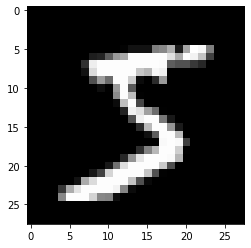

In [ ]:
import matplotlib.pyplot as plt
import numpy, random, os
a = int(random.random())
hinh = train_images[a]
plt.imshow(hinh,cmap = 'gray')
plt.show
print('Số này là:',train_labels[a])

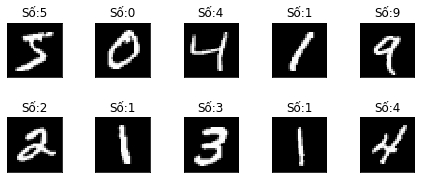

In [ ]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('Số:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Giai đoạn xử lí dữ liệu

In [ ]:
model = Sequential() #anh gom 28x28 (784 dau vao)
model.add(Dense(500,input_shape=(784,),activation='relu')) #lop dau tien la relu, thu 2 la softmax
model.add(Dense(10,activation='softmax')) #hàm để phân biệt 0 với 1 (gg thêm)

In [ ]:
#scale lại dữ liệu của t
train_images = train_images.reshape([60000,28*28])
train_image = train_images.astype('float32')/255 #nó là số nguyên(int) nên phải chuyển sang dạng float

In [ ]:
#scale lại dữ liệu của test_image
test_images = test_images.reshape([10000,28*28])
test_image = test_images.astype('float32')/255 #nó là số nguyên(int) nên phải chuyển sang dạng float

In [ ]:
#chuyeenr sang encoding het
from keras.utils import to_categorical #lệnh chuyển qua hot endcoding
train_label = to_categorical(train_labels,10) #10 bit
test_label = to_categorical(test_labels,10)   #1o bit

In [ ]:
train_label.shape

(60000, 10)

In [ ]:
train_label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Giai đoạn biên dịch

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['accuracy']) #bộ tối ưu cho đầu ra là phân loại(RMSprop). mất mát sư dụng categlanal_cross.. (cũng là phân loại)
model.fit(train_image,train_label,epochs=10,batch_size=128) #kích thước học 1 lần ngẫu nhiên 128 thôi, ko học hết, học 1o lần, 
test_loss,test_acc=model.evaluate(test_image,test_label)
print('tét_accuracy',test_acc)
print('tét_loss',test_loss)


Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 3.0734e-04 - accuracy: 1.0000
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 2.7374e-04 - accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 2.4555e-04 - accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 2.2582e-04 - accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 2.0571e-04 - accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.9138e-04 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 1.8038e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 1.6937e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 1.5925e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 2ms

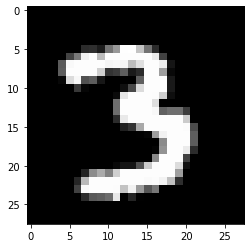

Số này là: 3


In [ ]:
import matplotlib.pyplot as plt
import numpy, random, os
hinh = test_images[500]
plt.imshow(hinh.reshape(28,28),cmap = 'gray')
plt.show()
print('Số này là:',test_labels[500])

In [ ]:
#test mo hinh


Lưu trữ và gọi mô hình ra

In [ ]:
from keras.models import load_model
model.save('model1.h5')
model11= load_model('model1.h5') 
#label1 = model11.predict(test_image[10])

cifar10

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
(x_trains,y_trains), (x_tests,y_tests) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
x_trains.shape #3 là 3 chiều (ảnh màu)

(50000, 32, 32, 3)

In [4]:
y_trains.shape

(50000, 1)

In [5]:
x_tests.shape

(10000, 32, 32, 3)

In [6]:
y_tests.shape

(10000, 1)

giai đoạn xử lý dữ liệu

In [7]:
model_1 = Sequential() #anh gom 32x32 (1024 dau vao)
model_1.add(Dense(512,input_shape=(1024*3,),activation='relu')) #lop dau tien la relu, thu 2 la softmax
model_1.add(Dense(206,activation='relu'))
model_1.add(Dense(103,activation='relu'))
model_1.add(Dense(10,activation='softmax')) #hàm để phân biệt 0 với 1 (gg thêm) chuyển về ảnh xám
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 206)               105678    
                                                                 
 dense_2 (Dense)             (None, 103)               21321     
                                                                 
 dense_3 (Dense)             (None, 10)                1040      
                                                                 
Total params: 1,701,415
Trainable params: 1,701,415
Non-trainable params: 0
_________________________________________________________________


In [8]:
#scale lại dữ liệu của x_train
#x_trains = x_trains[:, :, :, 0]
x_trains = x_trains.reshape([50000,32*32*3,1]) #giá trị 1 mảng chứa giá trị 3 kênh
x_train = x_trains.astype('float32')/255 #nó là số nguyên(int) nên phải chuyển sang dạng float

In [9]:
#scale lại dữ liệu của x_test
#x_tests = x_tests[:, :, :, 0]
x_tests = x_tests.reshape([10000,32*32*3,1])
x_test = x_tests.astype('float32')/255 #nó là số nguyên(int) nên phải chuyển sang dạng float

In [10]:
#chuyeenr sang encoding het
from keras.utils import to_categorical #lệnh chuyển qua hot endcoding
y_train = to_categorical(y_trains,10) #10 bit
y_test = to_categorical(y_tests,10)   #1o bit

Biên dịch

In [11]:
model_1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['accuracy']) #bộ tối ưu cho đầu ra là phân loại(RMSprop). mất mát sư dụng categlanal_cross.. (cũng là phân loại)
model_1.fit(x_train,y_train,epochs=10,batch_size=128) #kích thước học 1 lần ngẫu nhiên 128 thôi, ko học hết, học 1o lần, 
test_loss,test_acc=model_1.evaluate(x_test,y_test)
print('tét_accuracy',test_acc)
print('tét_loss',test_loss)

Epoch 1/10
391/391 [==============================] - 15s 35ms/step - loss: 2.0688 - accuracy: 0.2596
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 1.8004 - accuracy: 0.3528
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 1.7009 - accuracy: 0.3912
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 1.6316 - accuracy: 0.4161
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 1.5815 - accuracy: 0.4356
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 1.5375 - accuracy: 0.4522
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 1.5046 - accuracy: 0.4624
Epoch 8/10
391/391 [==============================] - 14s 35ms/step - loss: 1.4708 - accuracy: 0.4775
Epoch 9/10
391/391 [==============================] - 14s 35ms/step - loss: 1.4434 - accuracy: 0.4855
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 1.4742 

1/1 [==============================] - 0s 35ms/step
Là con ngựa


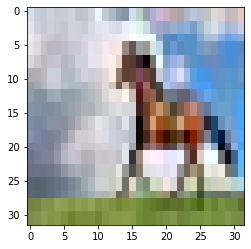

In [21]:
from keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('con_ngua.jpg',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,-1)
img = img.astype('float32')
img = img/255
a = np.argmax(model_1.predict(img),axis=-1)
if(a == 8):
  print('Là con ngựa')

In [20]:
#lưu trữ và gọi mô hình ra
from keras.models import load_model
model_1.save('model_1_out_10.h5')
model11= load_model('model_1_out_10.h5') 